# Linear Regression Practice

For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.







In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [4]:
gdp_le = pd.read_csv('../data/gdp_le.csv')

1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.  
    a. What coefficients do you get? Interpret the meaning of these coefficents.  
    b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the [patsy identity function](https://patsy.readthedocs.io/en/latest/builtins-reference.html#patsy.builtins.I) to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?  
    c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  
    d. Plot the actual values against your model's estimates for the mean life expectancy.  
    e. Inspect the R-squared value for the model. does it make sense, given the plot?  

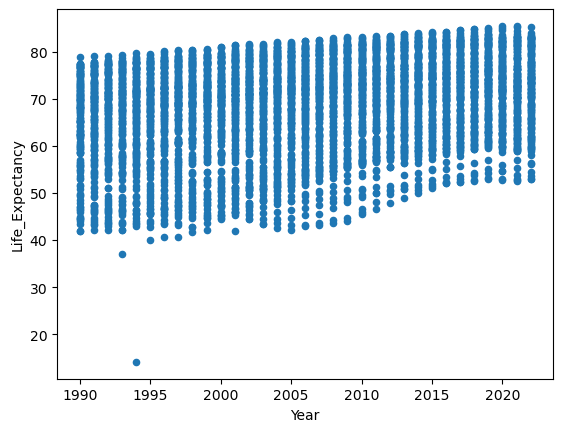

In [12]:
gdp_le.plot(kind="scatter", x="Year", y="Life_Expectancy");

In [10]:
lr_gdp_le = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()
lr_gdp_le.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        15:19:10   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -468.1381     26.087    -17.945      0.000    -519.279    -416.998
Year           0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                     4.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
lr_gdp_le.params

Intercept   -468.138140
Year           0.267722
dtype: float64

In [28]:
Intercept = lr_gdp_le.params['Intercept']
Slope = lr_gdp_le.params['Year']

In [62]:
print(f'mean life expectancy = {Slope:.2f}(x) + {Intercept:.2f}')
print(f'for every 1 unit increase in year, there is a {Slope:.2f} increase in life expectancy')

mean life expectancy = 0.27(x) + -468.14
for every 1 unit increase in year, there is a 0.27 increase in life expectancy


In [ ]:
gdp_le_after_1990 = gdp_le[gdp_le['Year'] >= 1990]
gdp_le_after_1990['Year']

In [ ]:
lr_gdp_le_1990 = smf.ols("Life_Expectancy ~ Year", data=gdp_le_after_1990).fit()

In [ ]:
lr_gdp_le_1990.params

In [165]:
pred_df = pd.DataFrame(
    {
        'Year': np.linspace(start=gdp_le['Year'].min(), stop=gdp_le['Year'].max())
    }
)

pred_df['Mean_Estimate'] = lr_gdp_le.predict(pred_df)

#pred_df.head(50)

In [84]:
Year_1990 = 1990
estimate = lr_gdp_le.params['Intercept'] + lr_gdp_le.params['Year']*Year
estimate

64.62888940412671

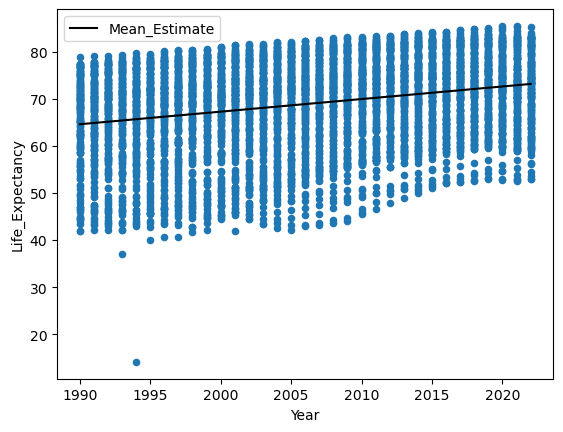

In [146]:
fig, ax = plt.subplots()
gdp_le.plot(kind="scatter", x="Year", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="Year", y="Mean_Estimate", color="black", ax=ax);

In [130]:
Year_List = gdp_le['Year'].unique().tolist()
means = []

for year in Year_List:
    estimate = lr_gdp_le.params['Intercept'] + lr_gdp_le.params['Year'] * year
    means.append({'Year': year, 'Estimated_Mean': estimate})


mean_estimates = pd.DataFrame(means)

#mean_estimates.head(33)

In [152]:
actual_estimates = gdp_le.groupby('Year')['Life_Expectancy'].mean().reset_index()
actual_estimates = actual_estimates.rename(columns={'Life_Expectancy': 'Mean_Actual'})

In [154]:
actual_v_estimate = pd.merge(mean_estimates, actual_estimates, how='inner', on=['Year'])
actual_v_estimate.head()

,Year,Estimated_Mean,Mean_Actual
0,2021,72.928275,71.520337
1,2020,72.660553,72.044532
2,2019,72.392831,72.726851
3,2018,72.125109,72.493003
4,2017,71.857387,72.280413


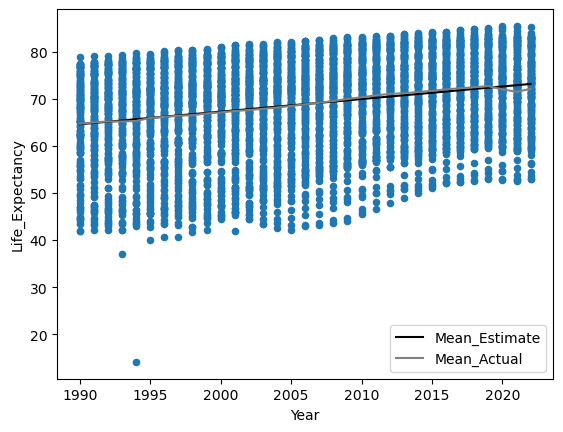

In [156]:
fig, ax = plt.subplots()
gdp_le.plot(kind="scatter", x="Year", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="Year", y="Mean_Estimate", color="black", ax=ax)
actual_estimates.plot(kind="line", x="Year",y="Mean_Actual", color = "grey", ax=ax);

2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  
    a. What coefficients do you get? Interpret the meaning of those coefficients.  
    b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?  
    c. Are the coefficients statistically significant?  
    d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000?
    e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

In [163]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497


In [169]:
lr_gdp_le = smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()
lr_gdp_le.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        19:57:34   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         65.9499      0.549    120.225      0.000      64.867      67.033
GDP_Per_Capita     0.0003   1.76e-05     14.608      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                     4.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [172]:
lr_gdp_le_adjusted = smf.ols("Life_Expectancy ~ I(GDP_Per_Capita *.001)", data=gdp_le_2021).fit()
lr_gdp_le_adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        20:01:47   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita * .001)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Now, fit a model for life expectancy based on the log of gdp per capita.  
    a. Inspect the coefficients for this model. Are they statistically significant?
    b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000? What about for those with a gdp per capita of $100,000?
    c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?

In [183]:
gdp_le_2021['GDP_log'] = np.log(gdp_le_2021['GDP_Per_Capita']).copy()

C:\Users\jdavis\AppData\Local\Temp\ipykernel_11772\493420873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['GDP_log'] = np.log(gdp_le_2021['GDP_Per_Capita']).copy()


In [185]:
lr_gdp_le_log = smf.ols("Life_Expectancy ~ GDP_log", data=gdp_le_2021).fit()
lr_gdp_le_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           1.06e-48
Time:                        20:07:51   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.9470      2.547      7.438      0.000      13.919      23.975
GDP_log        5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. Finally, return to the full dataset. 
    a. First, fit a linear regression model for life expectancy based on the log of gdp per capita.
    b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?

In [ ]:
lr_gdp_le_all = smf.ols("Life_Expectancy ~ GDP_log", data=gdp_le).fit()
lr_gdp_le_all.summary()